In [21]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [22]:
df= pd.read_excel(r'C:\Users\orlik\Downloads\tasks\score.xlsx')

In [23]:
df. head (10)

,Column1,birth,gender,employment,pos1,neg1,pos2,neg2,pos3,neg3,...,pos11,neg11,pos12,neg12,pos13,neg13,country,age,imcome,weights
0,0,1977,Female,Full-time student or homemaker,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,2.0,3.0,3.0,3.0,Australia,45,Low,0.910536
1,1,1990,Female,Full-time student or homemaker,3.0,2.0,2.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,32,Low,0.901440
2,2,1959,Male,"Employed full time (or self-employed), 30 or m...",5.0,2.0,4.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,63,High,1.643108
3,3,1995,Male,"Employed part-time, less than 30 hours per week",4.0,2.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,27,Med,0.710450
4,4,1958,Female,Retired,2.0,1.0,1.0,1.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,64,Low,0.992758
5,5,1983,Female,"Employed part-time, less than 30 hours per week",NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,4.0,5.0,1.0,1.0,Australia,39,Med,0.713358
6,6,1968,Male,"Employed full time (or self-employed), 30 or m...",NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,2.0,4.0,3.0,2.0,Australia,54,Med,0.717619
7,7,1964,Female,"Employed full time (or self-employed), 30 or m...",3.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,58,High,1.633353
8,8,1951,Male,"Employed part-time, less than 30 hours per week",4.0,2.0,3.0,4.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,71,Med,0.782421
9,9,1971,Female,Full-time student or homemaker,4.0,2.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Australia,51,Med,0.713358


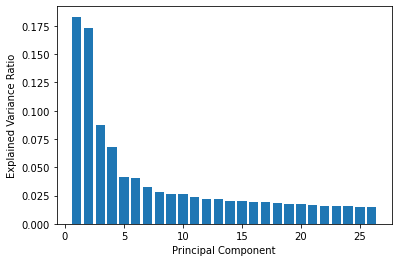

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load 
df= pd.read_excel(r'C:\Users\orlik\Downloads\tasks\score.xlsx')

# Select variables
columns = ["pos1", "pos2", "pos3", "pos4", "pos5", "pos6", "pos7", "pos8", "pos9", "pos10", "pos11", "pos12", "pos13", "neg1", "neg2", "neg3", "neg4", "neg5", "neg6", "neg7", "neg8", "neg9", "neg10", "neg11", "neg12", "neg13"]
df = df[columns]

# Impute the missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# PCA
pca = PCA()
pca.fit(df_imputed)


# Plot the explained variance ratio for each component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()



In [16]:
pca.explained_variance_ratio_

array([0.18306757, 0.17310894, 0.08703154, 0.06807049, 0.04177091,
       0.04065019, 0.0323642 , 0.02807281, 0.02633231, 0.02611843,
       0.02349306, 0.02215153, 0.0216552 , 0.02047618, 0.01981899,
       0.0194365 , 0.0193052 , 0.01833788, 0.01759459, 0.01747897,
       0.01689085, 0.01616729, 0.01564507, 0.01547631, 0.01479481,
       0.01469017])

In [25]:
# eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues: \n", eigenvalues)

#  eigenvectors
eigenvectors = pca.components_
print("Eigenvectors: \n", eigenvectors)

# generate dataframe from the eigenvalues and eigenvectors
df_eigen = pd.DataFrame({"Eigenvalue": eigenvalues, "Eigenvector": eigenvectors})
print("Dataframe of eigenvalues and eigenvectors: \n", df_eigen)

Eigenvalues: 
 [3.33732455 3.15577858 1.58658625 1.24092613 0.76148434 0.74105358
 0.58999992 0.51176782 0.48003835 0.47613929 0.42827882 0.4038227
 0.39477455 0.37328116 0.36130055 0.35432776 0.35193406 0.33429985
 0.32074972 0.3186419  0.30792044 0.29472985 0.28520985 0.28213331
 0.26970959 0.26780202]
Eigenvectors: 
 [[-3.16686057e-16 -5.35381843e-16 -4.07617393e-16 -2.41039423e-16
  -2.16365534e-16 -2.31915672e-16 -9.60030145e-17  2.10013715e-01
   2.62956812e-01  3.07110233e-01  2.01986014e-01  3.26607577e-01
   2.57936068e-01 -2.24872629e-16 -3.33143715e-16 -3.99571772e-16
  -3.62435978e-16 -2.82345484e-16 -2.30162658e-16  3.39057692e-01
   3.76218644e-01  3.37142229e-01  2.13357538e-01  2.90510022e-01
   2.37580189e-01  1.47993438e-01]
 [-2.70971415e-01 -3.39826229e-01 -3.20389547e-01 -2.09186417e-01
  -2.79930066e-01 -2.46331164e-01 -8.58456773e-02 -3.51098170e-16
  -3.24559745e-16 -4.41189666e-16 -2.27290108e-16 -2.97652771e-16
  -2.92674460e-16 -2.52845422e-01 -3.42832123e-01

ValueError: Per-column arrays must each be 1-dimensional

In [30]:
pca = PCA(4)
pca.fit(df_imputed)

PCA(n_components=4)

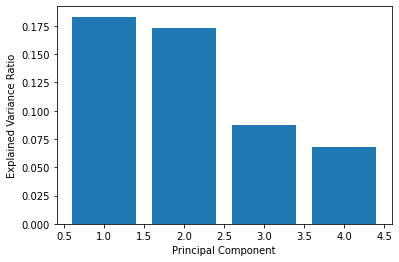

In [31]:
# Plot the explained variance for the questions selected
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


In [32]:

# eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues: \n", eigenvalues)

#  eigenvectors
eigenvectors = pca.components_
print("Eigenvectors: \n", eigenvectors)

# generate dataframe from the eigenvalues and eigenvectors
df_eigen = pd.DataFrame({"Eigenvalue": eigenvalues, "Eigenvector": eigenvectors})
print("Dataframe of eigenvalues and eigenvectors: \n", df_eigen)



Eigenvalues: 
 [3.33732454 3.15577852 1.58658156 1.24089246]
Eigenvectors: 
 [[-3.09955075e-06 -1.16462625e-06  1.89372171e-07 -5.43670742e-06
   3.09654684e-06  5.46419658e-06  6.93580552e-07  2.10010623e-01
   2.62954266e-01  3.07109421e-01  2.01987288e-01  3.26606746e-01
   2.57942504e-01 -4.59722220e-06  3.92327250e-06 -6.38781291e-06
   1.50611091e-06  6.13171328e-06  5.99996914e-07  3.39057691e-01
   3.76214690e-01  3.37141931e-01  2.13353418e-01  2.90512361e-01
   2.37583606e-01  1.47999506e-01]
 [-2.70976482e-01 -3.39821200e-01 -3.20388927e-01 -2.09169360e-01
  -2.79929547e-01 -2.46335824e-01 -8.58551112e-02 -1.77891352e-05
  -4.31390404e-07  7.61475231e-06 -3.55596454e-06  1.14766918e-06
   1.38075020e-05 -2.52833713e-01 -3.42829902e-01 -3.44679576e-01
  -2.29864531e-01 -2.56648822e-01 -3.15137845e-01  6.65430937e-07
  -1.95905602e-05 -2.83907310e-06 -4.48467616e-06  1.69282224e-05
   5.71068783e-06  7.61341328e-06]
 [-2.30525141e-04  1.60434198e-04  7.41512934e-05  1.46609418

ValueError: Per-column arrays must each be 1-dimensional